## GRIP :The Spark Foundation

### Data Science and Business Analytics Intern

#### Task 1:Prediction using Supervised ML

In this task we have to predict the percentage score of a student based on number of hours studied.These have two variables that is number of hours and score which is the target variable.

## Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data read

In [2]:
data=pd.read_csv('C:/Users/Bismi Joseph/Desktop/student_scores - student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Checking for missing values

In [8]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.duplicated().sum()

0

## EDA

In [11]:
col=data.columns

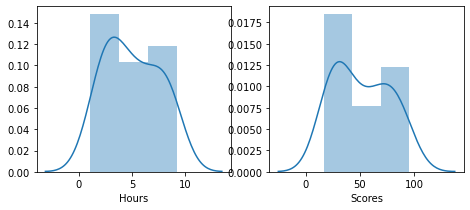

In [12]:
plt.figure(figsize=(16,14))
k=1
for i in col :
    plt.subplot(4,4,k)
    sns.distplot(data[i])
    k=k+1
plt.show()

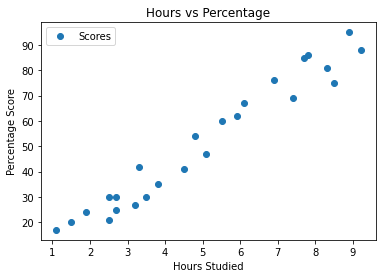

In [13]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

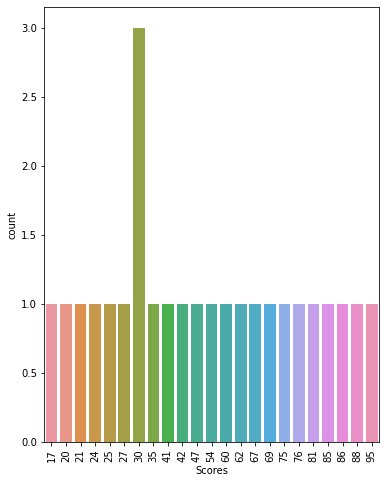

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(x='Scores',data=data)
plt.xticks(rotation=90)
plt.show()

## Preparing the data

In [45]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

## Train test split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Model buliding

### Linear Regression

In [48]:
from sklearn.linear_model import  LinearRegression

In [49]:
regressor=LinearRegression()

In [50]:
regressor.fit(x_train,y_train)

LinearRegression()

In [51]:
regressor.predict(x_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [52]:
regressor.score(x_test,y_test)

0.9454906892105354

In [53]:
regressor.score(x_train,y_train)

0.9515510725211552

## Plotting the regression line

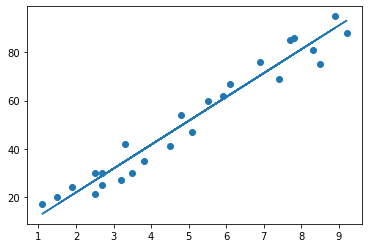

In [54]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Making predictons

In [55]:

y_pred = regressor.predict(x_test) # Predicting the scores

In [56]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  


In [57]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### What would be the predicted score if a student studies for 9.25 hours/day?

In [65]:
h=9.25
s=regressor.predict([[h]])
print("if a student studies for {} hours per day he or she will score {} ".format(h,s))

if a student studies for 9.25 hours per day he or she will score [93.69173249] 


## Model evaluvation

In [70]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R2 score: 0.9454906892105354


In [ ]:
_